<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motor-Cable-Characterization" data-toc-modified-id="Motor-Cable-Characterization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motor Cable Characterization</a></span><ul class="toc-item"><li><span><a href="#$R_s$:-series-resistance" data-toc-modified-id="$R_s$:-series-resistance-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>$R_s$: series resistance</a></span></li><li><span><a href="#$L_s$:-series-inductance" data-toc-modified-id="$L_s$:-series-inductance-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>$L_s$: series inductance</a></span></li><li><span><a href="#$R_{p1}$:-low-frequency-resistance" data-toc-modified-id="$R_{p1}$:-low-frequency-resistance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>$R_{p1}$: low frequency resistance</a></span></li><li><span><a href="#$R_{p2}$:-parallel-resistance-2" data-toc-modified-id="$R_{p2}$:-parallel-resistance-2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>$R_{p2}$: parallel resistance 2</a></span></li><li><span><a href="#$C_{p2}$:-parallel-capacitance-2" data-toc-modified-id="$C_{p2}$:-parallel-capacitance-2-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>$C_{p2}$: parallel capacitance 2</a></span></li><li><span><a href="#$C_{p1}$:-parallel-capacitance-1" data-toc-modified-id="$C_{p1}$:-parallel-capacitance-1-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>$C_{p1}$: parallel capacitance 1</a></span></li><li><span><a href="#Cable-Surge-Impedance-$Z_{o}$" data-toc-modified-id="Cable-Surge-Impedance-$Z_{o}$-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Cable Surge Impedance $Z_{o}$</a></span></li></ul></li><li><span><a href="#RC-Filter-Design" data-toc-modified-id="RC-Filter-Design-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RC Filter Design</a></span><ul class="toc-item"><li><span><a href="#$C_{p1}$-capacitance-re-calc" data-toc-modified-id="$C_{p1}$-capacitance-re-calc-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$C_{p1}$ capacitance re-calc</a></span><ul class="toc-item"><li><span><a href="#Reflection-coefficient" data-toc-modified-id="Reflection-coefficient-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Reflection coefficient</a></span></li><li><span><a href="#Motor-voltage" data-toc-modified-id="Motor-voltage-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Motor voltage</a></span></li><li><span><a href="#Cable-surge-impedance" data-toc-modified-id="Cable-surge-impedance-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Cable surge impedance</a></span></li></ul></li></ul></li><li><span><a href="#Variables-Affecting-Reflected-Wave-Magnitude" data-toc-modified-id="Variables-Affecting-Reflected-Wave-Magnitude-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Variables Affecting Reflected Wave Magnitude</a></span><ul class="toc-item"><li><span><a href="#Motor-Dielectric-Withstand,-Shaft-Current,-Distructive-to-Motor-Insulation" data-toc-modified-id="Motor-Dielectric-Withstand,-Shaft-Current,-Distructive-to-Motor-Insulation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Motor Dielectric Withstand, Shaft Current, Distructive to Motor Insulation</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import cmath

import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
from os import path


In [2]:
f_Rs = lambda Zsc_flo: np.real(Zsc_flo)
f_Ls = lambda fhi, Zsc_fhi: (1/(2*np.pi*fhi)) * np.imag(Zsc_fhi)

f_Rp2 = lambda Zoc_fhi: 1/np.real(1/Zoc_fhi)
f_Cp2 = lambda Zoc_fhi, fhi: np.imag(1/Zoc_fhi)/fhi/2/np.pi


f_Rp1 = lambda Zoc_flo: 1/np.real(1/Zoc_flo)
f_Cp1 = lambda Zoc_flo, flo, Cp2: np.imag(1/Zoc_flo)/flo/2/np.pi - Cp2


In [3]:
folders = glob.glob('*Scan*')
folders

['AWG26_Cable_OneTimeScan']

Motor Cable Characterization
-----------

In [4]:
OC_files = glob.glob(path.join(*[folders[0], '*OC*.csv']))
SC_files = glob.glob(path.join(*[folders[0], '*SC*.csv']))

print(OC_files)
print(SC_files)

['AWG26_Cable_OneTimeScan/OC.csv']
['AWG26_Cable_OneTimeScan/SC.csv']


Text(0, 0.5, 'phase, degree')

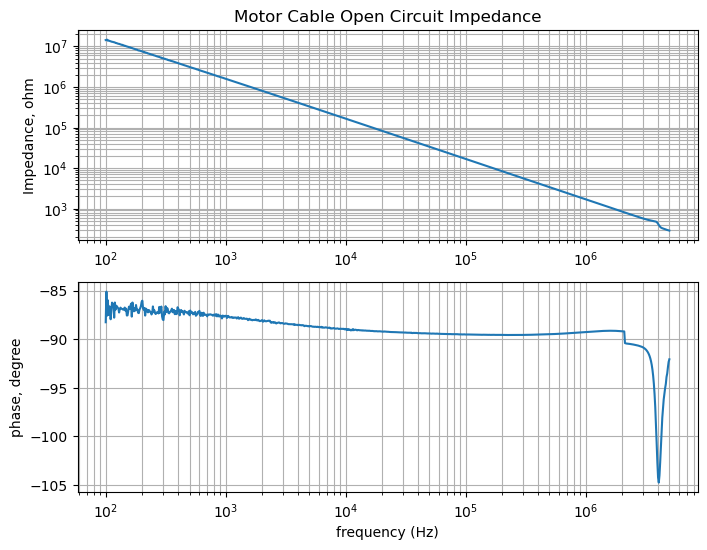

In [5]:
df_oc=pd.read_csv(OC_files[0], skiprows=17,
                 index_col=0, names=['frequency','Z','phase'], encoding = "ISO-8859-1")
df_oc.head()
plt.figure(figsize = (8,6))
ax1 = plt.subplot(2,1,1)
ax1.loglog(df_oc.frequency, df_oc.Z)
ax1.grid(which='both')
plt.title('Motor Cable Open Circuit Impedance')
plt.ylabel('Impedance, ohm')

ax2 = plt.subplot(2,1,2)
ax2.semilogx(df_oc.frequency, df_oc.phase)
ax2.grid(which='both')
plt.xlabel('frequency (Hz)')
plt.ylabel('phase, degree')


Text(0, 0.5, 'phase, degree')

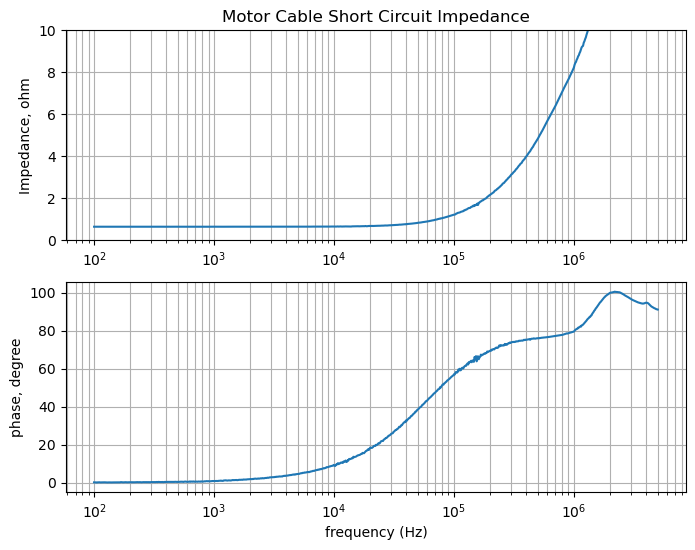

In [6]:
df_sc=pd.read_csv(SC_files[0], skiprows=17,
                 index_col=0, names=['frequency','Z','phase'], encoding = "ISO-8859-1")

plt.figure(figsize = (8,6))
ax1 = plt.subplot(2,1,1)
ax1.semilogx(df_sc.frequency, df_sc.Z)
ax1.grid(which='both')
plt.ylim(0,10)
plt.title('Motor Cable Short Circuit Impedance')
plt.ylabel('Impedance, ohm')

ax2 = plt.subplot(2,1,2)
ax2.semilogx(df_sc.frequency, df_sc.phase)
ax2.grid(which='both')
plt.xlabel('frequency (Hz)')
plt.ylabel('phase, degree')


### $R_s$: series resistance
At low freq $R_s$ dominate in short circuit test.

In [7]:
Zsc_flo = np.mean(df_sc.Z[0:50])
Rs = f_Rs(Zsc_flo)
Rs

0.6384519800000001

### $L_s$: series inductance
At high frequency the inductance dominate in short circuit test.

In [8]:
###### calculate from 200kHz measurement
fhi_sc,zsc_fhi_,deg_fhi_ = df_sc[df_sc.frequency == 200e3].mean()
print(fhi_sc,zsc_fhi_,deg_fhi_)

Zsc_fhi = cmath.rect(zsc_fhi_,np.deg2rad(deg_fhi_))
print(Zsc_fhi)

Ls = f_Ls(fhi_sc,Zsc_fhi)
print(Ls)

200000.0 2.148883 69.38
(0.7567686306950396+2.0112183837875377j)
1.6004767370853966e-06


### $R_{p1}$: low frequency resistance

In [9]:
#### The sampling at 200Hz looks more reasonable
# can change to other freq to test the results

oc_Rp1 = df_oc.iloc[(np.abs(df_oc.frequency - 200)).idxmin()]

flo_oc = np.array(oc_Rp1.frequency)

Zoc_flo = cmath.rect(oc_Rp1.Z, np.deg2rad(oc_Rp1.phase))
print(Zoc_flo)

Rp1 = f_Rp1(Zoc_flo)
Rp1

(524096.8505228074-7536518.876090743j)


108899326.94971669

### $R_{p2}$: parallel resistance 2

In [10]:
oc_Rp2 = df_oc.iloc[(np.abs(df_oc.frequency - 1000e3)).idxmin()]

fhi_oc = np.array(oc_Rp2.frequency)
Zoc_fhi = cmath.rect(oc_Rp2.Z, np.deg2rad(oc_Rp2.phase))

print(oc_Rp2, '\n')
print(Zoc_fhi)

Rp2 = f_Rp2(Zoc_fhi)
Rp2

frequency    1013600.000
Z               1678.081
phase            -89.255
Name: 683, dtype: float64 

(21.81897389556607-1677.939145183503j)


129059.95744984335

### $C_{p2}$: parallel capacitance 2

In [11]:
Cp2 = f_Cp2(Zoc_fhi, fhi_oc)
Cp2

9.356294762392624e-11

### $C_{p1}$: parallel capacitance 1

In [12]:
Cp1 = f_Cp1(Zoc_flo, flo_oc, Cp2)
Cp1

1.0457044732670699e-11

### Cable Surge Impedance $Z_{o}$

The cable characteristic impedance calculated from short- and open-circuit impedances,
$Z_o = \sqrt{Z_{oc} Z_{sc}}$


Text(0, 0.5, 'phase, degree')

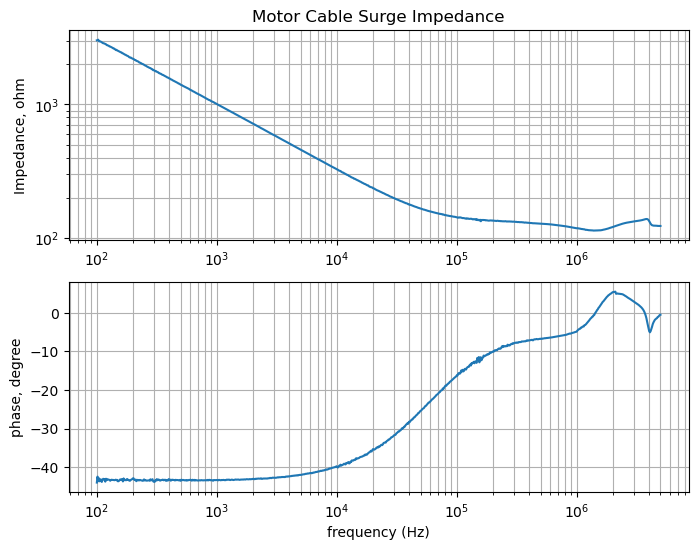

In [13]:
Zo = np.sqrt(df_oc.Z * df_sc.Z)
phi_o = (df_oc.phase + df_sc.phase)/2;

plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
ax1.loglog(df_oc.frequency, Zo)
ax1.grid(which='both')
plt.ylabel('Impedance, ohm')
plt.title('Motor Cable Surge Impedance')


ax2 = plt.subplot(2,1,2)
ax2.semilogx(df_oc.frequency, phi_o)

ax2.grid(which='both')
plt.xlabel('frequency (Hz)')
plt.ylabel('phase, degree')

RC Filter Design
-------------

In [14]:
Rx = np.mean(Zo[(df_oc.frequency>3e5) & (df_oc.frequency<1e6)])
Rx
Rx=51

In [15]:
Trise = 35e-9
Cx_max = Trise/0.1054/Rx
Cx_min = Trise/0.2231/Rx

print(Cx_max, Cx_min)

6.51114335677345e-09 3.07608475931834e-09


### $C_{p1}$ capacitance re-calc
According to surge impedance equation

$$|Z_o|_{f\rightarrow\infty} = \sqrt{\dfrac{L_s}{C_{p1}}}$$

In [16]:
Cp1 = Ls/(Rx**2)
Cp1

6.153313099136472e-10

In [17]:
circuit = pd.DataFrame(np.array([[Rs, Ls, Rp1, Cp1, Rp2, Cp2]])*1e6,
             columns=['Rs', 'Ls', 'Rp1', 'Cp1', 'Rp2', 'Cp2'])
circuit

,Rs,Ls,Rp1,Cp1,Rp2,Cp2
0,638451.98,1.600477,1.088993e+14,0.000615,1.290600e+11,0.000094


In [18]:
len_us = 2.4
len_hv = 2.4
len_jp = 1.8
len_cn = 2.4

Lus_1m = Ls/len_us
Cus_1m = Cp1/len_us
print(Lus_1m, Cus_1m)

6.668653071189152e-07 2.56388045797353e-10


Voltage ring-up factor, or reflection coefficient $\Gamma$ where $0<\Gamma<1$.

#### Reflection coefficient
$$\Gamma = \dfrac{Z_L-Z_0}{Z_L+Z_0}$$

#### Motor voltage
$$V_{receiving} = (1+\Gamma) V_{sending}$$

#### Cable surge impedance

$$Z_0 = \sqrt{Z_{OC} Z_{SC}}$$

The surge impedance by this method is actually a vector. When the frequency is very high,
$$|Z_o|_{f\rightarrow\infty} = \sqrt{\dfrac{L_s}{C_{p}}}$$

## Variables Affecting Reflected Wave Magnitude
- Cable surge impedance
- Motor surge impedance
- Motor load
- Cable length
- Magnitude of drive pulse (DC link voltage)
- Drive pulse rise time
- Spacing of PWM pulses (responsible for some >2X overvoltage)

Text(0.5, 1.0, 'cable over-voltage estimation @ speed =0.25c')

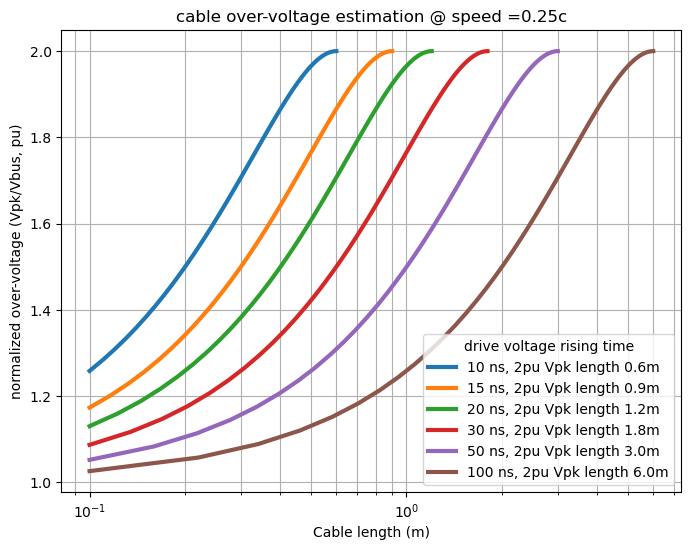

In [19]:
trise = np.array([10, 15, 20, 30, 50, 100]) * 1e-9
fe = 1/np.pi/trise # effective switching frequency
c = 3e8
v= 1/np.sqrt(Lus_1m*Cus_1m) # travelling wave velocity
wavelength = v/fe
lc = wavelength/4

# print(fe, '\n', lc)

plt.figure(figsize=(8,6))
for i_, lc_ in enumerate(lc):

    l_ = np.linspace(0.1, lc_, 50)

    Vpk = np.sin(np.pi/2 * (l_/lc_)) + 1
    plt.semilogx(l_, Vpk,
                 label='{:.0f} ns, 2pu Vpk length {:.1f}m'.format(trise[i_]*1e9, lc_),
                 linewidth=3)

plt.grid(which='both')
plt.legend(title='drive voltage rising time')
plt.xlabel('Cable length (m)')
plt.ylabel('normalized over-voltage (Vpk/Vbus, pu)')
plt.title('cable over-voltage estimation @ speed ={:.2f}c'.format(v/c))

Text(0.5, 1.0, 'cable over-voltage estimation @ speed =0.25c')

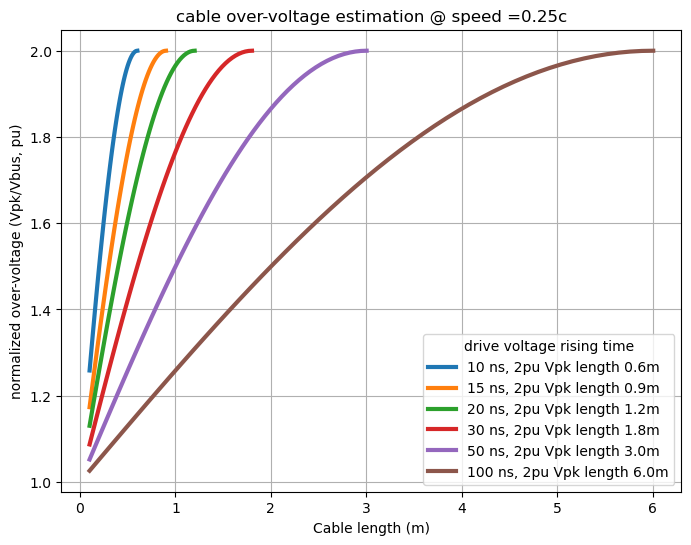

In [20]:
plt.figure(figsize=(8,6))
for i_, lc_ in enumerate(lc):

    l_ = np.linspace(0.1, lc_, 50)

    Vpk = np.sin(np.pi/2 * (l_/lc_)) + 1
    plt.plot(l_, Vpk,
                 label='{:.0f} ns, 2pu Vpk length {:.1f}m'.format(trise[i_]*1e9, lc_),
                 linewidth=3)

plt.grid(which='both')
plt.legend(title='drive voltage rising time')
plt.xlabel('Cable length (m)')
plt.ylabel('normalized over-voltage (Vpk/Vbus, pu)')
plt.title('cable over-voltage estimation @ speed ={:.2f}c'.format(v/c))

### Motor Dielectric Withstand, Shaft Current, Distructive to Motor Insulation

In [21]:
fe

array([31830988.61837907, 21220659.07891938, 15915494.30918953,
       10610329.53945969,  6366197.72367581,  3183098.86183791])

In [22]:
140**2/120**2 * 310

421.94444444444446

In [23]:
52*17**2

15028

In [24]:
49*(19**2)*2

35378